## Q.  피마 인디언 당뇨병 예측모델을 만들고 아래사항을 수행하세요.
- diabetes.csv
 - 데이터 세트는 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터임.
 - 고립된 지역에서 인디언 고유의 혈통이 지속돼 왔지만 20세기 후반에 들어서면서 서구화된 식습관으로 많은 당뇨 환자 발생
 
- Logistic Regression 을 사용하여 예측모델을 만들고 평가 지표함수를 이용, 정확도, 정밀도, 재현율, F1 Score를 출력

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('diabetes.csv')

display(df.head())

df.columns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## 피처 정보
- 'Pregnancies'(임신 횟수)
- 'Glucose'(포도당 부하 검사 수치)
- 'BloodPressure'(혈압)
- 'SkinThickness'(팔 삼두근 뒤쪽의 피하지방 측정값)
- 'Insulin'(혈청 인슈린),
- 'BMI'(체질량 지수)
- 'DiabetesPedigreeFunction'(당뇨 내력 가중치 값)
- 'Age'
- 'Outcome'

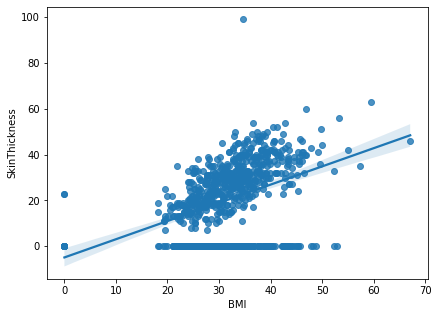

In [17]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)

sns.regplot(x='BMI',     # x축 변수
           y='SkinThickness',     # y축 변수
           data=df, # 데이터
           ax=ax1,
           fit_reg=True)

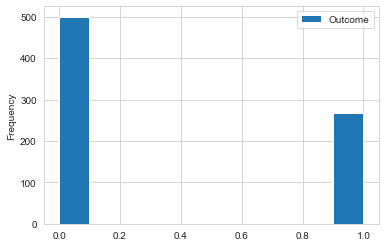

In [27]:
df.set_index(['Age'])

tdf = df.loc[:,['Outcome']]
tdf.plot(kind='hist')

In [7]:
def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}'.format(accuracy, precision, recall, f1))

In [28]:
# X = df.drop('Outcome', axis=1)
# y = df.Outcome

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804
